# Data Analysis of Clash Royale Battles of January 1, 2021

In this data analysis, the goal is to determine which cards are played the most, and which cards are most likely to make the player win when they are present in his deck, thus determining which are the best cards.

Therefore, we will be interested in the following 2 rates:
- the Pick Rate (frequency at which cards are taken from the deck)
- the Win Rate (how often the cards make the player win when they are taken in the deck)

## Data sources

Clash Royale Battles of January 1, 2021 :

https://www.kaggle.com/bwandowando/clash-royale-season-18-dec-0320-dataset?select=BattlesStaging_01012021_WL_tagged


Master List of cards of the season 18 : 

https://www.kaggle.com/bwandowando/clash-royale-season-18-dec-0320-dataset?select=CardMasterListSeason18_12082020.csv

## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('D:/MesFichiers/MesDocuments/ISART/TRAVAIL/PEA/Python/Data/FichiersData/BattlesStaging_01012021_WL_tagged.csv')
df.head()

,Unnamed: 0,battleTime,arena.id,gameMode.id,average.startingTrophies,winner.tag,winner.startingTrophies,winner.trophyChange,winner.crowns,winner.kingTowerHitPoints,winner.princessTowersHitPoints,winner.clan.tag,winner.clan.badgeId,loser.tag,loser.startingTrophies,loser.trophyChange,loser.crowns,loser.kingTowerHitPoints,loser.clan.tag,loser.clan.badgeId,loser.princessTowersHitPoints,tournamentTag,winner.card1.id,winner.card1.level,winner.card2.id,winner.card2.level,winner.card3.id,winner.card3.level,winner.card4.id,winner.card4.level,winner.card5.id,winner.card5.level,winner.card6.id,winner.card6.level,winner.card7.id,winner.card7.level,winner.card8.id,winner.card8.level,winner.cards.list,winner.totalcard.level,winner.troop.count,winner.structure.count,winner.spell.count,winner.common.count,winner.rare.count,winner.epic.count,winner.legendary.count,winner.elixir.average,loser.card1.id,loser.card1.level,loser.card2.id,loser.card2.level,loser.card3.id,loser.card3.level,loser.card4.id,loser.card4.level,loser.card5.id,loser.card5.level,loser.card6.id,loser.card6.level,loser.card7.id,loser.card7.level,loser.card8.id,loser.card8.level,loser.cards.list,loser.totalcard.level,loser.troop.count,loser.structure.count,loser.spell.count,loser.common.count,loser.rare.count,loser.epic.count,loser.legendary.count,loser.elixir.average
0,0,2020-12-31 21:02:12+00:00,54000050.0,72000006.0,5363.0,#PVLPJP2Y,5372.0,28.0,2.0,4145.0,[1484],#2PYV00GQ,16000030.0,#PLYJVUQY2,5354.0,-28.0,1.0,1402.0,#8G2QJ9Y2,16000044.0,NaN,NaN,26000008,13,26000022,13,28000001,13,26000004,13,26000003,13,27000004,13,28000002,13,26000006,13,"[26000003, 26000004, 26000006, 26000008, 26000...",104,5,1,2,3,2,3,0,4.500,27000004,13,26000015,13,28000010,13,28000009,13,28000012,13,26000023,13,26000000,13,28000015,13,"[26000000, 26000015, 26000023, 27000004, 28000...",104,3,1,4,1,1,4,2,3.500
1,1,2020-12-31 21:02:15+00:00,54000050.0,72000006.0,5407.0,#8PRLRYYCV,5409.0,29.0,1.0,5304.0,"[579, 3082]",NaN,NaN,#92VG2CPY,5405.0,-29.0,0.0,5107.0,#8V22RYJ9,16000097.0,[2280],NaN,26000056,13,28000011,12,27000003,12,26000010,12,28000004,13,26000000,13,26000040,12,26000026,12,"[26000000, 26000010, 26000026, 26000040, 26000...",99,5,1,2,2,2,2,2,2.875,26000037,13,26000046,13,26000055,13,28000009,13,27000001,13,26000062,13,26000023,13,26000027,13,"[26000023, 26000027, 26000037, 26000046, 26000...",104,6,1,1,0,1,2,5,4.250
2,2,2020-12-31 21:02:45+00:00,54000050.0,72000006.0,5741.0,#2G8LQRCG,5749.0,28.0,2.0,5762.0,"[2080, 2099]",#29GY0C28,16000112.0,#2PCUY9U80,5733.0,-28.0,0.0,2070.0,#YCU29JR2,16000077.0,NaN,NaN,26000044,13,26000059,13,26000010,13,26000061,13,26000055,13,26000042,13,28000015,13,28000008,13,"[26000010, 26000042, 26000044, 26000055, 26000...",104,6,0,2,2,1,2,3,3.500,26000046,13,26000041,13,26000028,13,26000049,13,26000022,13,26000027,13,28000008,13,26000059,13,"[26000022, 26000027, 26000028, 26000041, 26000...",104,7,0,1,4,2,1,1,4.125
3,3,2020-12-31 21:03:13+00:00,54000050.0,72000006.0,4307.0,#Y9QL09VGV,4316.0,28.0,2.0,4392.0,[1322],#2J9YCYG0,16000168.0,#9GJJGYL8P,4298.0,-28.0,1.0,4228.0,#YR9YCRRC,16000163.0,NaN,NaN,28000004,11,28000000,9,26000041,11,26000016,10,26000026,10,28000011,11,26000023,10,28000012,8,"[26000016, 26000023, 26000026, 26000041, 28000...",80,4,0,4,1,1,3,3,3.250,26000027,10,26000031,10,28000000,10,26000033,10,26000046,10,26000012,10,26000062,10,27000006,10,"[26000012, 26000027, 26000031, 26000033, 26000...",80,6,1,1,2,1,2,3,3.750
4,4,2020-12-31 21:03:17+00:00,54000050.0,72000006.0,5776.5,#9RRYG9P9U,5783.0,28.0,3.0,5832.0,"[3668, 3668]",#V0U,16000054.0,#80J0LUCP8,5770.0,-28.0,0.0,NaN,#2QP222UU,16000114.0,NaN,NaN,28000011,13,26000021,13,26000014,13,26000038,13,28000000,13,26000030,13,26000010,13,27000000,13,"[26000010, 26000014, 26000021, 26000030, 26000...",104,5,1,2,3,4,0,1,2.625,26000021,13,27000004,13,26000037,13,28000011,13,26000064,13,28000000,13,26000011,13,26000010,13,"[26000010, 26000011, 26000021, 26000037, 26000...",104,5,1,2,2,4,0,2,3.250


## Card Sorting

The cards are sorted according to whether they were used by winners or losers, and according to whether they were used by "pros" or "noobs".

I set the limit between "pros" and "noobs" at 4600 trophies, which corresponds to the entry in the arena "15. Challenger III" arena, because it is from this arena that I noticed that the players have a good level and set up real strategies.

In [4]:
winner_cards_cols = ["winner.card" + str(x) + ".id" for x in range(1,9)]
winner_cards_cols

['winner.card1.id',
 'winner.card2.id',
 'winner.card3.id',
 'winner.card4.id',
 'winner.card5.id',
 'winner.card6.id',
 'winner.card7.id',
 'winner.card8.id']

In [5]:
loser_cards_cols = ["loser.card" + str(x) + ".id" for x in range(1,9)]
loser_cards_cols

['loser.card1.id',
 'loser.card2.id',
 'loser.card3.id',
 'loser.card4.id',
 'loser.card5.id',
 'loser.card6.id',
 'loser.card7.id',
 'loser.card8.id']

In [6]:
df_pros_winner_cards = df[winner_cards_cols][df['average.startingTrophies']>=4600]
df_pros_winner_cards

,winner.card1.id,winner.card2.id,winner.card3.id,winner.card4.id,winner.card5.id,winner.card6.id,winner.card7.id,winner.card8.id
0,26000008,26000022,28000001,26000004,26000003,27000004,28000002,26000006
1,26000056,28000011,27000003,26000010,28000004,26000000,26000040,26000026
2,26000044,26000059,26000010,26000061,26000055,26000042,28000015,28000008
4,28000011,26000021,26000014,26000038,28000000,26000030,26000010,27000000
5,26000041,26000045,28000002,26000043,26000049,26000011,26000021,28000011
...,...,...,...,...,...,...,...,...
2823520,28000004,26000026,26000018,28000011,26000000,27000006,26000049,26000027
2823521,26000009,26000018,26000015,28000001,26000039,26000048,28000007,28000015
2823523,26000012,26000016,26000017,26000007,28000003,26000024,27000006,27000010
2823524,28000007,26000012,28000000,27000001,26000022,26000008,26000019,26000032


In [7]:
df_pros_loser_cards = df[loser_cards_cols][df['average.startingTrophies']>=4600]
df_pros_loser_cards

,loser.card1.id,loser.card2.id,loser.card3.id,loser.card4.id,loser.card5.id,loser.card6.id,loser.card7.id,loser.card8.id
0,27000004,26000015,28000010,28000009,28000012,26000023,26000000,28000015
1,26000037,26000046,26000055,28000009,27000001,26000062,26000023,26000027
2,26000046,26000041,26000028,26000049,26000022,26000027,28000008,26000059
4,26000021,27000004,26000037,28000011,26000064,28000000,26000011,26000010
5,26000009,26000001,26000045,26000038,26000039,28000015,28000000,28000008
...,...,...,...,...,...,...,...,...
2823520,28000008,28000000,26000049,26000040,26000011,28000004,26000021,27000003
2823521,28000004,27000004,26000040,26000000,28000011,26000026,26000010,26000056
2823523,26000019,26000000,28000000,26000032,28000011,27000004,26000058,26000049
2823524,26000080,26000037,28000011,26000009,26000048,28000007,26000035,26000032


In [8]:
df_noobs_winner_cards = df[winner_cards_cols][df['average.startingTrophies']<4600]
df_noobs_winner_cards

,winner.card1.id,winner.card2.id,winner.card3.id,winner.card4.id,winner.card5.id,winner.card6.id,winner.card7.id,winner.card8.id
3,28000004,28000000,26000041,26000016,26000026,28000011,26000023,28000012
10,28000015,26000009,26000035,28000012,26000063,26000054,26000039,26000015
16,26000009,26000048,26000035,28000015,26000039,26000015,28000008,28000007
19,28000004,28000000,26000041,26000016,26000026,28000011,26000023,28000012
26,28000001,28000004,26000020,28000005,26000026,26000022,26000012,26000017
...,...,...,...,...,...,...,...,...
2823513,28000007,26000017,26000067,26000062,26000055,26000063,26000020,26000018
2823515,27000006,28000011,26000010,28000003,26000037,26000000,26000001,27000008
2823518,26000035,26000006,26000064,26000011,28000008,28000005,27000006,26000012
2823522,28000008,26000044,26000034,27000003,26000021,28000000,26000000,26000042


In [9]:
df_noobs_loser_cards = df[loser_cards_cols][df['average.startingTrophies']<4600]
df_noobs_loser_cards

,loser.card1.id,loser.card2.id,loser.card3.id,loser.card4.id,loser.card5.id,loser.card6.id,loser.card7.id,loser.card8.id
3,26000027,26000031,28000000,26000033,26000046,26000012,26000062,27000006
10,28000011,26000011,26000017,26000015,26000021,26000037,26000024,26000012
16,28000003,26000055,26000022,26000009,26000006,26000085,27000008,26000037
19,26000026,26000042,26000020,26000055,26000045,26000017,28000000,28000005
26,26000017,26000022,26000006,26000011,26000012,26000046,26000042,28000005
...,...,...,...,...,...,...,...,...
2823513,26000083,28000015,28000016,26000055,26000062,26000054,26000061,26000044
2823515,28000000,26000024,26000061,26000042,28000016,26000015,27000012,28000015
2823518,26000055,26000017,26000032,26000011,26000018,26000035,26000014,26000042
2823522,28000008,26000011,26000004,28000010,26000042,26000035,26000017,28000001


## Card counting

In [10]:
df_pros_winner_cards_values, df_pros_winner_cards_counts = np.unique(df_pros_winner_cards, return_counts=True)

In [11]:
df_pros_loser_cards_values, df_pros_loser_cards_counts = np.unique(df_pros_loser_cards, return_counts=True)

In [12]:
df_noobs_winner_cards_values, df_noobs_winner_cards_counts = np.unique(df_noobs_winner_cards, return_counts=True)

In [13]:
df_noobs_loser_cards_values, df_noobs_loser_cards_counts = np.unique(df_noobs_loser_cards, return_counts=True)

In [14]:
df_MasterList = pd.read_csv("D:/MesFichiers/MesDocuments/ISART/TRAVAIL/PEA/Python/Data/FichiersData/CardMasterListSeason18_12082020.csv")

## Setup of the card counts' DataFrame

In [15]:
df_counts = df_MasterList.copy()
df_counts

,team.card1.id,team.card1.name
0,26000000,Knight
1,26000001,Archers
2,26000002,Goblins
3,26000003,Giant
4,26000004,P.E.K.K.A
...,...,...
97,28000014,Earthquake
98,28000015,Barbarian Barrel
99,28000016,Heal Spirit
100,28000017,Giant Snowball


In [16]:
df_counts.rename(columns={"team.card1.id" : "Card ID", "team.card1.name" : "Card Name"}, inplace=True)

## Assignment of card counts

In [17]:
df_counts["Winner Use (PRO)"] = df_pros_winner_cards_counts
df_counts["Loser Use (PRO)"] = df_pros_loser_cards_counts
df_counts["Winner Use (NOOB)"] = df_noobs_winner_cards_counts
df_counts["Loser Use (NOOB)"] = df_noobs_loser_cards_counts
df_counts

,Card ID,Card Name,Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,319232,318508,169214,179742
1,26000001,Archers,100801,101545,61201,82352
2,26000002,Goblins,20413,20656,10678,18237
3,26000003,Giant,107688,107503,43266,60057
4,26000004,P.E.K.K.A,205842,200343,123006,115558
...,...,...,...,...,...,...
97,28000014,Earthquake,50016,51666,9234,11282
98,28000015,Barbarian Barrel,205406,195090,59375,59503
99,28000016,Heal Spirit,19419,20719,11156,13421
100,28000017,Giant Snowball,59814,59990,17205,19832


## Usage Calculation

In [18]:
df_counts["Total Winner Use"] = df_counts["Winner Use (PRO)"] + df_counts["Winner Use (NOOB)"]
df_counts["Total Loser Use"] = df_counts["Loser Use (PRO)"] + df_counts["Loser Use (NOOB)"]
df_counts["Total Use (PRO)"] = df_counts["Winner Use (PRO)"] + df_counts["Loser Use (PRO)"]
df_counts["Total Use (NOOB)"] = df_counts["Winner Use (NOOB)"] + df_counts["Loser Use (NOOB)"]
df_counts

,Card ID,Card Name,Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB),Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB)
0,26000000,Knight,319232,318508,169214,179742,488446,498250,637740,348956
1,26000001,Archers,100801,101545,61201,82352,162002,183897,202346,143553
2,26000002,Goblins,20413,20656,10678,18237,31091,38893,41069,28915
3,26000003,Giant,107688,107503,43266,60057,150954,167560,215191,103323
4,26000004,P.E.K.K.A,205842,200343,123006,115558,328848,315901,406185,238564
...,...,...,...,...,...,...,...,...,...,...
97,28000014,Earthquake,50016,51666,9234,11282,59250,62948,101682,20516
98,28000015,Barbarian Barrel,205406,195090,59375,59503,264781,254593,400496,118878
99,28000016,Heal Spirit,19419,20719,11156,13421,30575,34140,40138,24577
100,28000017,Giant Snowball,59814,59990,17205,19832,77019,79822,119804,37037


In [19]:
df_counts_columns = list(df_counts.columns)
df_counts = df_counts[df_counts_columns[0:2] + df_counts_columns[6:10] + df_counts_columns[2:6]]
df_counts

,Card ID,Card Name,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,488446,498250,637740,348956,319232,318508,169214,179742
1,26000001,Archers,162002,183897,202346,143553,100801,101545,61201,82352
2,26000002,Goblins,31091,38893,41069,28915,20413,20656,10678,18237
3,26000003,Giant,150954,167560,215191,103323,107688,107503,43266,60057
4,26000004,P.E.K.K.A,328848,315901,406185,238564,205842,200343,123006,115558
...,...,...,...,...,...,...,...,...,...,...
97,28000014,Earthquake,59250,62948,101682,20516,50016,51666,9234,11282
98,28000015,Barbarian Barrel,264781,254593,400496,118878,205406,195090,59375,59503
99,28000016,Heal Spirit,30575,34140,40138,24577,19419,20719,11156,13421
100,28000017,Giant Snowball,77019,79822,119804,37037,59814,59990,17205,19832


In [20]:
df_counts.insert(2, "Total Use", df_counts["Total Winner Use"]+df_counts["Total Loser Use"])
df_counts

,Card ID,Card Name,Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,986696,488446,498250,637740,348956,319232,318508,169214,179742
1,26000001,Archers,345899,162002,183897,202346,143553,100801,101545,61201,82352
2,26000002,Goblins,69984,31091,38893,41069,28915,20413,20656,10678,18237
3,26000003,Giant,318514,150954,167560,215191,103323,107688,107503,43266,60057
4,26000004,P.E.K.K.A,644749,328848,315901,406185,238564,205842,200343,123006,115558
...,...,...,...,...,...,...,...,...,...,...,...
97,28000014,Earthquake,122198,59250,62948,101682,20516,50016,51666,9234,11282
98,28000015,Barbarian Barrel,519374,264781,254593,400496,118878,205406,195090,59375,59503
99,28000016,Heal Spirit,64715,30575,34140,40138,24577,19419,20719,11156,13421
100,28000017,Giant Snowball,156841,77019,79822,119804,37037,59814,59990,17205,19832


## Pick Rate Calculation

In [21]:
games_nb = len(df)
games_nb

2823527

In [22]:
pros_games_nb = len(df_pros_winner_cards)
pros_games_nb

1742323

In [23]:
noobs_games_nb = len(df_noobs_winner_cards)
noobs_games_nb

1081204

In [24]:
df_counts.insert(2, "Global Pick Rate", df_counts["Total Use"]/games_nb)
df_counts.insert(3, "Pick Rate (PRO)", df_counts["Total Use (PRO)"]/pros_games_nb)
df_counts.insert(4, "Pick Rate (NOOB)", df_counts["Total Use (NOOB)"]/noobs_games_nb)
df_counts

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,0.349455,0.366029,0.322748,986696,488446,498250,637740,348956,319232,318508,169214,179742
1,26000001,Archers,0.122506,0.116136,0.132771,345899,162002,183897,202346,143553,100801,101545,61201,82352
2,26000002,Goblins,0.024786,0.023571,0.026743,69984,31091,38893,41069,28915,20413,20656,10678,18237
3,26000003,Giant,0.112807,0.123508,0.095563,318514,150954,167560,215191,103323,107688,107503,43266,60057
4,26000004,P.E.K.K.A,0.228349,0.233128,0.220647,644749,328848,315901,406185,238564,205842,200343,123006,115558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,28000014,Earthquake,0.043278,0.058360,0.018975,122198,59250,62948,101682,20516,50016,51666,9234,11282
98,28000015,Barbarian Barrel,0.183945,0.229863,0.109950,519374,264781,254593,400496,118878,205406,195090,59375,59503
99,28000016,Heal Spirit,0.022920,0.023037,0.022731,64715,30575,34140,40138,24577,19419,20719,11156,13421
100,28000017,Giant Snowball,0.055548,0.068761,0.034255,156841,77019,79822,119804,37037,59814,59990,17205,19832


## Win Rate Calculation

In [25]:
df_counts.insert(5, 'Global Win Rate', df_counts['Total Winner Use']/ df_counts['Total Use'])
df_counts.insert(6, 'Win Rate (PRO)', df_counts['Winner Use (PRO)']/ df_counts['Total Use (PRO)'])
df_counts.insert(7, 'Win Rate (NOOB)', df_counts['Winner Use (NOOB)']/ df_counts['Total Use (NOOB)'])
df_counts

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,0.349455,0.366029,0.322748,0.495032,0.500568,0.484915,986696,488446,498250,637740,348956,319232,318508,169214,179742
1,26000001,Archers,0.122506,0.116136,0.132771,0.468351,0.498162,0.426330,345899,162002,183897,202346,143553,100801,101545,61201,82352
2,26000002,Goblins,0.024786,0.023571,0.026743,0.444259,0.497042,0.369289,69984,31091,38893,41069,28915,20413,20656,10678,18237
3,26000003,Giant,0.112807,0.123508,0.095563,0.473932,0.500430,0.418745,318514,150954,167560,215191,103323,107688,107503,43266,60057
4,26000004,P.E.K.K.A,0.228349,0.233128,0.220647,0.510040,0.506769,0.515610,644749,328848,315901,406185,238564,205842,200343,123006,115558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,28000014,Earthquake,0.043278,0.058360,0.018975,0.484869,0.491886,0.450088,122198,59250,62948,101682,20516,50016,51666,9234,11282
98,28000015,Barbarian Barrel,0.183945,0.229863,0.109950,0.509808,0.512879,0.499462,519374,264781,254593,400496,118878,205406,195090,59375,59503
99,28000016,Heal Spirit,0.022920,0.023037,0.022731,0.472456,0.483806,0.453920,64715,30575,34140,40138,24577,19419,20719,11156,13421
100,28000017,Giant Snowball,0.055548,0.068761,0.034255,0.491064,0.499265,0.464535,156841,77019,79822,119804,37037,59814,59990,17205,19832


## Final DataFrame

In [26]:
pd.set_option('display.max_rows', 1000)

In [27]:
df_counts

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,0.349455,0.366029,0.322748,0.495032,0.500568,0.484915,986696,488446,498250,637740,348956,319232,318508,169214,179742
1,26000001,Archers,0.122506,0.116136,0.132771,0.468351,0.498162,0.426330,345899,162002,183897,202346,143553,100801,101545,61201,82352
2,26000002,Goblins,0.024786,0.023571,0.026743,0.444259,0.497042,0.369289,69984,31091,38893,41069,28915,20413,20656,10678,18237
3,26000003,Giant,0.112807,0.123508,0.095563,0.473932,0.500430,0.418745,318514,150954,167560,215191,103323,107688,107503,43266,60057
4,26000004,P.E.K.K.A,0.228349,0.233128,0.220647,0.510040,0.506769,0.515610,644749,328848,315901,406185,238564,205842,200343,123006,115558
5,26000005,Minions,0.183672,0.188364,0.176112,0.493988,0.501757,0.480597,518604,256184,262420,328191,190413,164672,163519,91512,98901
6,26000006,Balloon,0.289819,0.280829,0.304306,0.504360,0.502039,0.507813,818312,412724,405588,489295,329017,245645,243650,167079,161938
7,26000007,Witch,0.284272,0.220978,0.386269,0.502450,0.490913,0.513086,802651,403292,399359,385015,417636,189009,196006,214283,203353
8,26000008,Barbarians,0.098323,0.107095,0.084187,0.499451,0.505649,0.486745,277617,138656,138961,186594,91023,94351,92243,44305,46718
9,26000009,Golem,0.153439,0.182290,0.106947,0.512004,0.510337,0.516583,433239,221820,211419,317608,115631,162087,155521,59733,55898


In [28]:
pd.reset_option('display.max_rows')

## Sorted DataFrames

### Pick Rate Sorted DataFrames

In [29]:
df_counts_pickrate_sorted = df_counts.sort_values('Global Pick Rate', ascending=False)
df_counts_pickrate_sorted

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
94,28000011,The Log,0.575322,0.534026,0.641870,0.503116,0.499851,0.507494,1624437,817281,807156,930445,693992,465084,465361,352197,341795
91,28000008,Zap,0.553916,0.629006,0.432911,0.508894,0.504321,0.519603,1563997,795909,768088,1095932,468065,552701,543231,243208,224857
11,26000011,Valkyrie,0.545913,0.548884,0.541125,0.502879,0.496240,0.513730,1541400,775137,766263,956334,585066,474571,481763,300566,284500
17,26000017,Wizard,0.539694,0.471992,0.648793,0.498446,0.489639,0.508771,1523841,759553,764288,822363,701478,402661,419702,356892,344586
83,28000000,Fireball,0.495818,0.538706,0.426707,0.495566,0.495886,0.494916,1399956,693771,706185,938599,461357,465438,473161,228333,233024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,28000016,Heal Spirit,0.022920,0.023037,0.022731,0.472456,0.483806,0.453920,64715,30575,34140,40138,24577,19419,20719,11156,13421
76,27000005,Barbarian Hut,0.020355,0.021698,0.018192,0.449090,0.499511,0.352179,57474,25811,31663,37805,19669,18884,18921,6927,12742
101,28000018,Royal Delivery,0.018591,0.021152,0.014464,0.497657,0.498087,0.496643,52492,26123,26369,36853,15639,18356,18497,7767,7872
60,26000060,Goblin Giant,0.017416,0.021291,0.011171,0.505714,0.511187,0.488905,49174,24868,24306,37096,12078,18963,18133,5905,6173


In [30]:
df_counts_pickrate_pro_sorted = df_counts.sort_values('Pick Rate (PRO)', ascending=False)
df_counts_pickrate_pro_sorted

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
91,28000008,Zap,0.553916,0.629006,0.432911,0.508894,0.504321,0.519603,1563997,795909,768088,1095932,468065,552701,543231,243208,224857
11,26000011,Valkyrie,0.545913,0.548884,0.541125,0.502879,0.496240,0.513730,1541400,775137,766263,956334,585066,474571,481763,300566,284500
83,28000000,Fireball,0.495818,0.538706,0.426707,0.495566,0.495886,0.494916,1399956,693771,706185,938599,461357,465438,473161,228333,233024
94,28000011,The Log,0.575322,0.534026,0.641870,0.503116,0.499851,0.507494,1624437,817281,807156,930445,693992,465084,465361,352197,341795
17,26000017,Wizard,0.539694,0.471992,0.648793,0.498446,0.489639,0.508771,1523841,759553,764288,822363,701478,402661,419702,356892,344586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,27000005,Barbarian Hut,0.020355,0.021698,0.018192,0.449090,0.499511,0.352179,57474,25811,31663,37805,19669,18884,18921,6927,12742
60,26000060,Goblin Giant,0.017416,0.021291,0.011171,0.505714,0.511187,0.488905,49174,24868,24306,37096,12078,18963,18133,5905,6173
101,28000018,Royal Delivery,0.018591,0.021152,0.014464,0.497657,0.498087,0.496643,52492,26123,26369,36853,15639,18356,18497,7767,7872
28,26000028,Three Musketeers,0.015712,0.018294,0.011550,0.498197,0.500408,0.492553,44362,22101,22261,31874,12488,15950,15924,6151,6337


In [31]:
df_counts_pickrate_noob_sorted = df_counts.sort_values('Pick Rate (NOOB)', ascending=False)
df_counts_pickrate_noob_sorted

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
12,26000012,Skeleton Army,0.488210,0.366751,0.683938,0.502172,0.496674,0.506922,1378474,692231,686243,638998,739476,317374,321624,374857,364619
17,26000017,Wizard,0.539694,0.471992,0.648793,0.498446,0.489639,0.508771,1523841,759553,764288,822363,701478,402661,419702,356892,344586
94,28000011,The Log,0.575322,0.534026,0.641870,0.503116,0.499851,0.507494,1624437,817281,807156,930445,693992,465084,465361,352197,341795
11,26000011,Valkyrie,0.545913,0.548884,0.541125,0.502879,0.496240,0.513730,1541400,775137,766263,956334,585066,474571,481763,300566,284500
55,26000055,Mega Knight,0.389626,0.305608,0.525019,0.501715,0.497058,0.506084,1100120,551947,548173,532467,567653,264667,267800,287280,280373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,27000005,Barbarian Hut,0.020355,0.021698,0.018192,0.449090,0.499511,0.352179,57474,25811,31663,37805,19669,18884,18921,6927,12742
53,26000053,Rascals,0.023881,0.028287,0.016781,0.512154,0.509445,0.519511,67429,34534,32895,49285,18144,25108,24177,9426,8718
101,28000018,Royal Delivery,0.018591,0.021152,0.014464,0.497657,0.498087,0.496643,52492,26123,26369,36853,15639,18356,18497,7767,7872
28,26000028,Three Musketeers,0.015712,0.018294,0.011550,0.498197,0.500408,0.492553,44362,22101,22261,31874,12488,15950,15924,6151,6337


### Win Rate Sorted DataFrames

In [32]:
df_counts_winrate_sorted = df_counts.sort_values('Global Win Rate', ascending=False)
df_counts_winrate_sorted

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
36,26000036,Battle Ram,0.069408,0.084862,0.044504,0.518990,0.517852,0.522486,195975,101709,94266,147857,48118,76568,71289,25141,22977
39,26000039,Mega Minion,0.135737,0.177683,0.068142,0.515163,0.514956,0.516037,383257,197440,185817,309582,73675,159421,150161,38019,35656
48,26000048,Night Witch,0.133009,0.158307,0.092243,0.514037,0.514408,0.513010,375555,193049,182506,275822,99733,141885,133937,51164,48569
29,26000029,Lava Hound,0.047113,0.058340,0.029020,0.513930,0.516454,0.505753,133024,68365,64659,101647,31377,52496,49151,15869,15508
53,26000053,Rascals,0.023881,0.028287,0.016781,0.512154,0.509445,0.519511,67429,34534,32895,49285,18144,25108,24177,9426,8718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,26000001,Archers,0.122506,0.116136,0.132771,0.468351,0.498162,0.426330,345899,162002,183897,202346,143553,100801,101545,61201,82352
66,26000068,Battle Healer,0.023007,0.025741,0.018601,0.465279,0.473009,0.448041,64961,30225,34736,44849,20112,21214,23635,9011,11101
80,27000009,Tombstone,0.038211,0.037981,0.038583,0.459881,0.509271,0.381532,107891,49617,58274,66175,41716,33701,32474,15916,25800
76,27000005,Barbarian Hut,0.020355,0.021698,0.018192,0.449090,0.499511,0.352179,57474,25811,31663,37805,19669,18884,18921,6927,12742


In [33]:
df_counts_winrate_pro_sorted = df_counts.sort_values('Win Rate (PRO)', ascending=False)
df_counts_winrate_pro_sorted

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
36,26000036,Battle Ram,0.069408,0.084862,0.044504,0.518990,0.517852,0.522486,195975,101709,94266,147857,48118,76568,71289,25141,22977
29,26000029,Lava Hound,0.047113,0.058340,0.029020,0.513930,0.516454,0.505753,133024,68365,64659,101647,31377,52496,49151,15869,15508
39,26000039,Mega Minion,0.135737,0.177683,0.068142,0.515163,0.514956,0.516037,383257,197440,185817,309582,73675,159421,150161,38019,35656
54,26000054,Cannon Cart,0.039183,0.049719,0.022204,0.512121,0.514528,0.503436,110634,56658,53976,86627,24007,44572,42055,12086,11921
48,26000048,Night Witch,0.133009,0.158307,0.092243,0.514037,0.514408,0.513010,375555,193049,182506,275822,99733,141885,133937,51164,48569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,28000006,Mirror,0.099184,0.088124,0.117008,0.476777,0.474528,0.479507,280049,133521,146528,153540,126509,72859,80681,60662,65847
68,26000083,Mother Witch,0.047360,0.041329,0.057078,0.485593,0.474142,0.498955,133721,64934,68787,72008,61713,34142,37866,30792,30921
66,26000068,Battle Healer,0.023007,0.025741,0.018601,0.465279,0.473009,0.448041,64961,30225,34736,44849,20112,21214,23635,9011,11101
70,26000085,Electro Giant,0.029954,0.009137,0.063501,0.471700,0.471043,0.471853,84577,39895,44682,15920,68657,7499,8421,32396,36261


In [34]:
df_counts_winrate_noob_sorted = df_counts.sort_values('Win Rate (NOOB)', ascending=False)
df_counts_winrate_noob_sorted

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
43,26000043,Elite Barbarians,0.125383,0.121702,0.131314,0.505391,0.492968,0.523944,354021,178919,175102,212044,141977,104531,107513,74388,67589
36,26000036,Battle Ram,0.069408,0.084862,0.044504,0.518990,0.517852,0.522486,195975,101709,94266,147857,48118,76568,71289,25141,22977
24,26000024,Royal Giant,0.124393,0.139916,0.099378,0.503424,0.495756,0.520819,351227,176816,174411,243779,107448,120855,122924,55961,51487
41,26000041,Goblin Gang,0.269922,0.318851,0.191075,0.509092,0.504741,0.520792,762133,387996,374137,555542,206591,280405,275137,107591,99000
91,28000008,Zap,0.553916,0.629006,0.432911,0.508894,0.504321,0.519603,1563997,795909,768088,1095932,468065,552701,543231,243208,224857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,26000003,Giant,0.112807,0.123508,0.095563,0.473932,0.500430,0.418745,318514,150954,167560,215191,103323,107688,107503,43266,60057
72,27000001,Goblin Hut,0.073811,0.078417,0.066389,0.470047,0.504651,0.404179,208407,97961,110446,136627,71780,68949,67678,29012,42768
80,27000009,Tombstone,0.038211,0.037981,0.038583,0.459881,0.509271,0.381532,107891,49617,58274,66175,41716,33701,32474,15916,25800
2,26000002,Goblins,0.024786,0.023571,0.026743,0.444259,0.497042,0.369289,69984,31091,38893,41069,28915,20413,20656,10678,18237


## Visualization

### Pick Rate

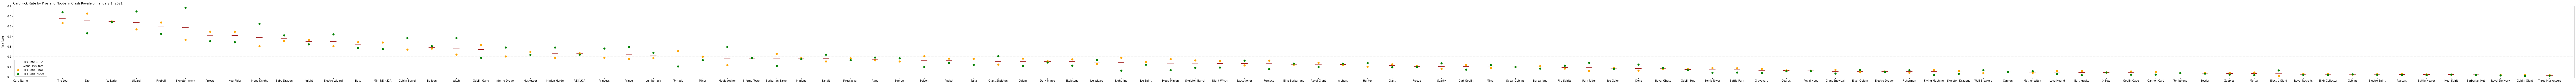

In [35]:
plt.figure(figsize=(175,5))

plt.scatter(df_counts_pickrate_sorted["Card Name"], df_counts_pickrate_sorted["Global Pick Rate"],
            marker='_', c="brown", lw=2, s=600, label="Global Pick rate")
plt.scatter(df_counts_pickrate_sorted["Card Name"], df_counts_pickrate_sorted["Pick Rate (PRO)"],
            marker='o', c="orange", s=50, label="Pick Rate (PRO)")
plt.scatter(df_counts_pickrate_sorted["Card Name"], df_counts_pickrate_sorted["Pick Rate (NOOB)"],
            marker='o', c="green", s=50, label="Pick Rate (NOOB)")
plt.plot([-2, 102], [0.2, 0.2], c="black", lw=1, ls='--', label='Pick Rate = 0.2')
plt.margins(0, 0.025)
plt.title("Card Pick Rate by Pros and Noobs in Clash Royale on January 1, 2021", loc="left")
plt.xlabel("Card Name :", loc='left', labelpad=-10)
plt.ylabel("Pick Rate", labelpad=10)
plt.legend(loc='lower left')

plt.show()

Overview of the cards with the highest Pick Rate

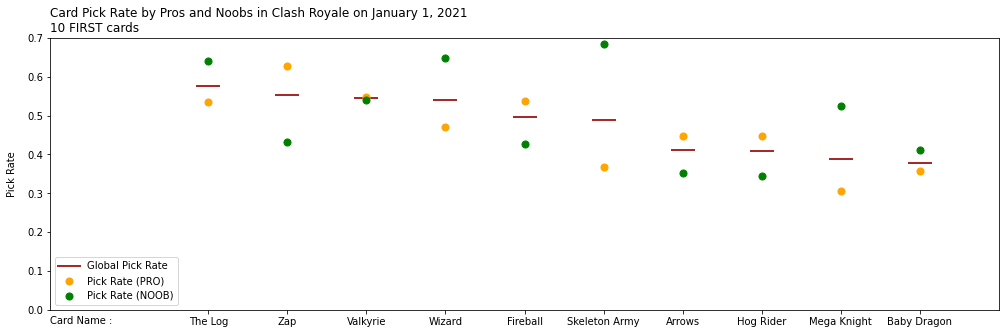

In [36]:
plt.figure(figsize=(17,5))

plt.scatter(df_counts_pickrate_sorted["Card Name"][:10], df_counts_pickrate_sorted["Global Pick Rate"][:10],
            marker='_', c="brown", lw=2, s=600, label="Global Pick Rate")
plt.scatter(df_counts_pickrate_sorted["Card Name"][:10], df_counts_pickrate_sorted["Pick Rate (PRO)"][:10],
            marker='o', c="orange", s=50, label="Pick Rate (PRO)")
plt.scatter(df_counts_pickrate_sorted["Card Name"][:10], df_counts_pickrate_sorted["Pick Rate (NOOB)"][:10],
            marker='o', c="green", s=50, label="Pick Rate (NOOB)")
plt.axis([-2, 10, 0, 0.7])
plt.title("Card Pick Rate by Pros and Noobs in Clash Royale on January 1, 2021 \n10 FIRST cards", loc='left')
plt.xlabel("Card Name :", loc='left', labelpad=-11)
plt.ylabel("Pick Rate", labelpad=10)
plt.legend(loc='lower left')

plt.show()

Overview of the cards with the lowest Pick Rate

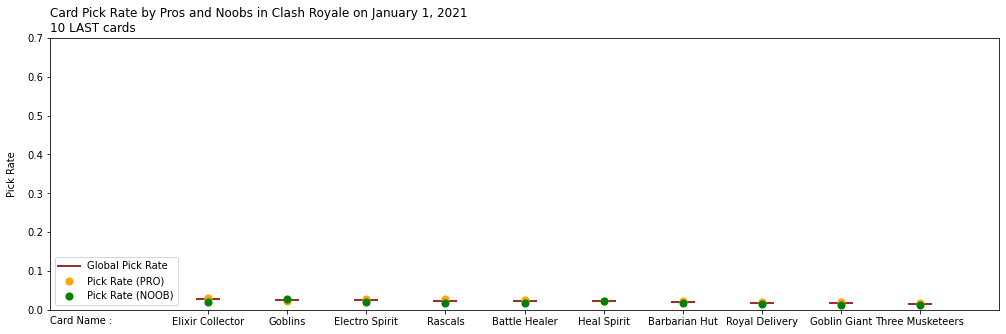

In [37]:
plt.figure(figsize=(17,5))

plt.scatter(df_counts_pickrate_sorted["Card Name"][-10:], df_counts_pickrate_sorted["Global Pick Rate"][-10:],
            marker='_', c="brown", lw=2, s=600, label="Global Pick Rate")
plt.scatter(df_counts_pickrate_sorted["Card Name"][-10:], df_counts_pickrate_sorted["Pick Rate (PRO)"][-10:],
            marker='o', c="orange", s=50, label="Pick Rate (PRO)")
plt.scatter(df_counts_pickrate_sorted["Card Name"][-10:], df_counts_pickrate_sorted["Pick Rate (NOOB)"][-10:],
            marker='o', c="green", s=50, label="Pick Rate (NOOB)")
plt.axis([-2, 10, 0, 0.7])
plt.title("Card Pick Rate by Pros and Noobs in Clash Royale on January 1, 2021 \n10 LAST cards", loc='left')
plt.xlabel("Card Name :", loc='left', labelpad=-11)
plt.ylabel("Pick Rate", labelpad=10)
plt.legend(loc='lower left')

plt.show()

### Win Rate

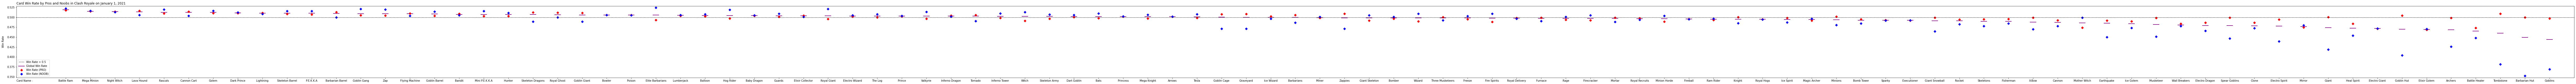

In [38]:
plt.figure(figsize=(175,5))

plt.scatter(df_counts_winrate_sorted["Card Name"], df_counts_winrate_sorted["Global Win Rate"],
            marker='_', c="purple", lw=2, s=600, label="Global Win Rate")
plt.scatter(df_counts_winrate_sorted["Card Name"], df_counts_winrate_sorted["Win Rate (PRO)"],
            marker='D', c="red", s=40, label="Win Rate (PRO)")
plt.scatter(df_counts_winrate_sorted["Card Name"], df_counts_winrate_sorted["Win Rate (NOOB)"],
            marker='D', c="blue", s=40, label="Win Rate (NOOB)")
plt.plot([-2, 102], [0.5, 0.5], c="black", lw=1, ls='--', label='Win Rate = 0.5')
plt.margins(0, 0.025)
plt.title("Card Win Rate by Pros and Noobs in Clash Royale on January 1, 2021", loc='left')
plt.xlabel("Card Name :", loc='left', labelpad=-10)
plt.ylabel("Win Rate", labelpad=10)
plt.legend(loc='lower left')

plt.show()

Overview of the cards with the highest Win Rate

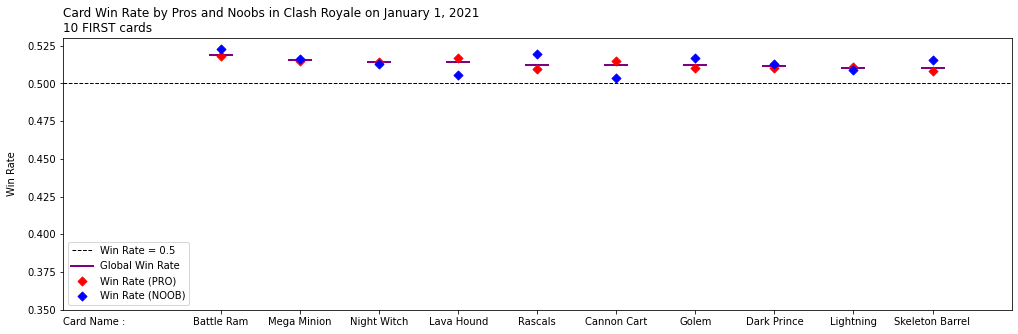

In [39]:
plt.figure(figsize=(17,5))

plt.scatter(df_counts_winrate_sorted["Card Name"][:10], df_counts_winrate_sorted["Global Win Rate"][:10],
            marker='_', c="purple", lw=2, s=600, label="Global Win Rate")
plt.scatter(df_counts_winrate_sorted["Card Name"][:10], df_counts_winrate_sorted["Win Rate (PRO)"][:10],
            marker='D', c="red", s=40, label="Win Rate (PRO)")
plt.scatter(df_counts_winrate_sorted["Card Name"][:10], df_counts_winrate_sorted["Win Rate (NOOB)"][:10],
            marker='D', c="blue", s=40, label="Win Rate (NOOB)")
plt.plot([-2, 10], [0.5, 0.5], c="black", lw=1, ls='--', label='Win Rate = 0.5')
plt.axis([-2, 10, 0.350, 0.53])
plt.title("Card Win Rate by Pros and Noobs in Clash Royale on January 1, 2021 \n10 FIRST cards", loc='left')
plt.xlabel("Card Name :", loc='left', labelpad=-10)
plt.ylabel("Win Rate", labelpad=10)
plt.legend(loc='lower left')

plt.show()

Overview of the cards with the lowest Win Rate

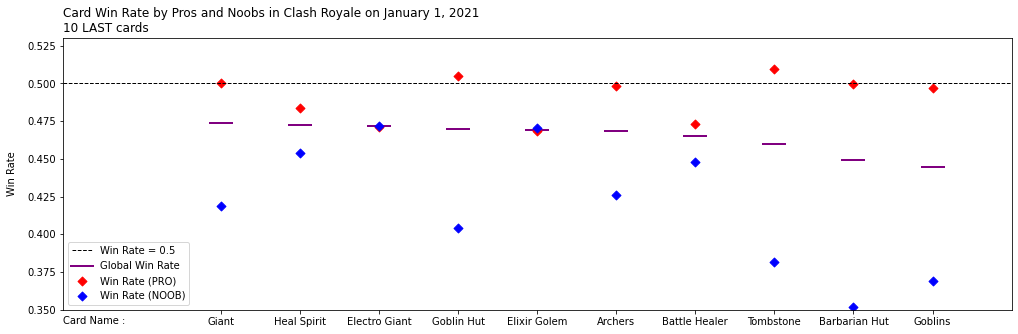

In [40]:
plt.figure(figsize=(17,5))

plt.scatter(df_counts_winrate_sorted["Card Name"][-10:], df_counts_winrate_sorted["Global Win Rate"][-10:],
            marker='_', c="purple", lw=2, s=600, label="Global Win Rate")
plt.scatter(df_counts_winrate_sorted["Card Name"][-10:], df_counts_winrate_sorted["Win Rate (PRO)"][-10:],
            marker='D', c="red", s=40, label="Win Rate (PRO)")
plt.scatter(df_counts_winrate_sorted["Card Name"][-10:], df_counts_winrate_sorted["Win Rate (NOOB)"][-10:],
            marker='D', c="blue", s=40, label="Win Rate (NOOB)")
plt.plot([-2, 10], [0.5, 0.5], c="black", lw=1, ls='--', label='Win Rate = 0.5')
plt.axis([-2, 10, 0.350, 0.53])
plt.title("Card Win Rate by Pros and Noobs in Clash Royale on January 1, 2021 \n10 LAST cards", loc='left')
plt.xlabel("Card Name :", loc='left', labelpad=-11)
plt.ylabel("Win Rate", labelpad=10)
plt.legend(loc='lower left')

plt.show()